# Decision Tree
Decision Trees is a useful predictive model in machine learning. Starting with observations, the data is separated as best as possible using different classifiers. This constannt splitting results in a tree-like decision process. This process is accomplished usually by minimizing the Gini loss function for each split. The Gini function calculates how well each split separates the data. If the split results in a mixed bag of observations, then the Gini result is high. If a split ends with all of one class on one side and all of another class on the other side, then that Gini result is low. We want to find the lowest Gini scores for splitting as we possibly can. This usually results in the most influential characteristics being used first in the tree.

I'll be using sci-kit learn for this project because it has an extremely easy-to-use and efficient class to handle a decision tree

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [46]:
# Reading in the data and splitting it into training and testing data
iris = pd.read_csv('iris_data.csv')
iris.head()

train_data = iris.loc[np.arange(0,40)].append(iris.loc[np.arange(50,90)],ignore_index=True).append(iris.loc[np.arange(100,140)],
                                                                                                   ignore_index=True)
test_data = iris.loc[np.arange(40,50)].append(iris.loc[np.arange(90,100)],ignore_index=True).append(iris.loc[np.arange(140,150)],
                                                                                                    ignore_index=True)

train_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
# Creating and training our model
x = train_data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = np.array(train_data['Species'])
clf = tree.DecisionTreeClassifier(max_depth=3)
model = clf.fit(x, y)

In [48]:
# Using the model to predict the testing data
predictions = model.predict(test_data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']])
pct_correct = 100 * np.count_nonzero(predictions==np.array(test_data['Species'])) / len(test_data)
print('The decision tree model correctly predicted ', pct_correct, '% of the test data correctly', sep='') 

The decision tree model correctly predicted 100.0% of the test data correctly


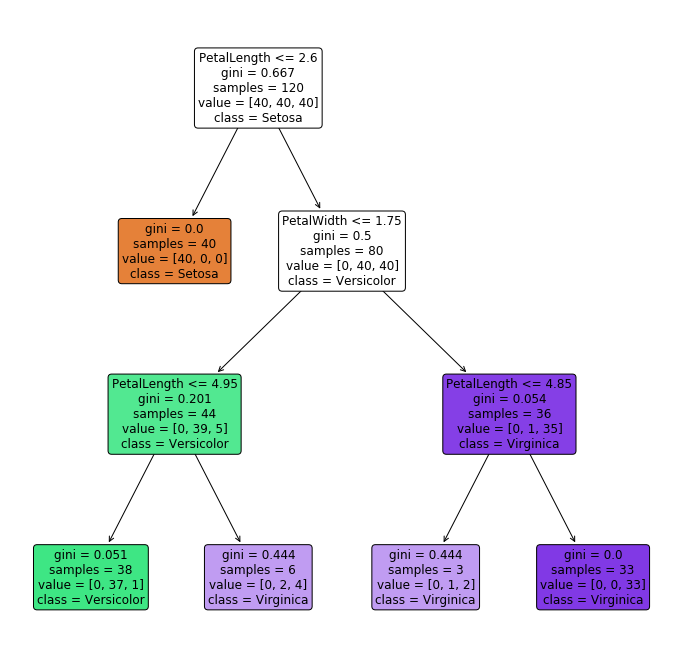

In [49]:
# Plotting the tree
plt.figure(figsize=(12, 12))
tree.plot_tree(model, feature_names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'],
              class_names=['Setosa', 'Versicolor', 'Virginica'], filled=True, fontsize=12,
              rounded=True, rotate=True)
plt.show()

### Explanation of the Plot:
- The top line shows us what the criteria is for each observation. If an observation meets that criteria, that observation is pushed down to the left. If an observation answers that question negatively, then it is pushed down to the right.
- The second line is the Gini function's output for that criteria. That is the lowest Gini score that the algorithm could find based on all possible splits.
- Samples indicates the number of observations that are contained in that box. You can see that the top-most box constains 120 observations, our entire training data set. The two child nodes of each parent contain all the samples from the parent.
- The value tells us how many observations of each type are in that box. The list indicates how many [setosa, veriscolor, virginica] observations are in that box.
- Finally, the class tells us what the majority of observations in that box are classified as. In the case of leaf/end nodes, the class also represents what the decision tree would classify any observations that fall into that box as.

The colors and darkness of the boxes is indicative of how the classes are distributed throughout the tree. Purple boxes have more Virginica flowers in them, green boxes have more Versicolor boxes in them, and orange boxes have more Setosa flowers in them.

I also wanted to give the user an idea of how separable the data is, in 3D. The plot below is a 3D scatterplot of the iris data set based on 3 of the 4 features. Feel free to change up the features to see how the graph changes

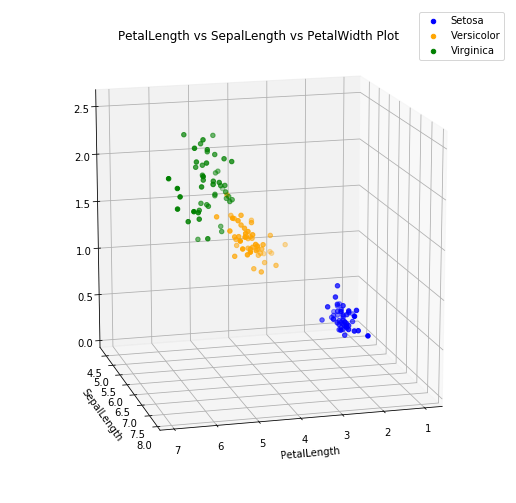

In [59]:
# Preparing the data
# Change these features however you want, and the rest of the program will run accordingly
# Can be two of any of these four: SepalLength, SepalWidth, PetalLength, PetalWidth
feature1 = 'PetalLength'
feature2 = 'SepalLength'
feature3 = 'PetalWidth'

s_x = np.array(iris[iris['Species']=='setosa'][feature1])
s_y = np.array(iris[iris['Species']=='setosa'][feature2])
s_z = np.array(iris[iris['Species']=='setosa'][feature3])
ve_x = np.array(iris[iris['Species']=='versicolor'][feature1])
ve_y = np.array(iris[iris['Species']=='versicolor'][feature2])
ve_z = np.array(iris[iris['Species']=='versicolor'][feature3])
vi_x = np.array(iris[iris['Species']=='virginica'][feature1])
vi_y = np.array(iris[iris['Species']=='virginica'][feature2])
vi_z = np.array(iris[iris['Species']=='virginica'][feature3])
        
# Plotting the 3D surface
plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
ax.scatter3D(s_x, s_y, s_z, color='blue', label='Setosa')
ax.scatter3D(ve_x, ve_y, ve_z, color='orange', label='Versicolor')
ax.scatter3D(vi_x, vi_y, vi_z, color='green', label='Virginica')

ax.view_init(15, 75)
       
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(feature1 + ' vs ' + feature2 + ' vs ' + feature3 + ' Plot')
plt.legend()